<a href="https://colab.research.google.com/github/karinaa17-spec/Tranfer_learning_Gat_x_Dog.ipynb/blob/main/reconhecimentofacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow opencv-python matplotlib face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=4474bd2b788e2776ed48379166dab0bae5ca93266278bbe85bf07f955995aef3
  Stored in directory: /root/.cache/pip/wheels/8f/47/c8/f44c5aebb7507f7c8a2c0bd23151d732d0f0bd6884ad4ac635
Successfully built face-recognition-models


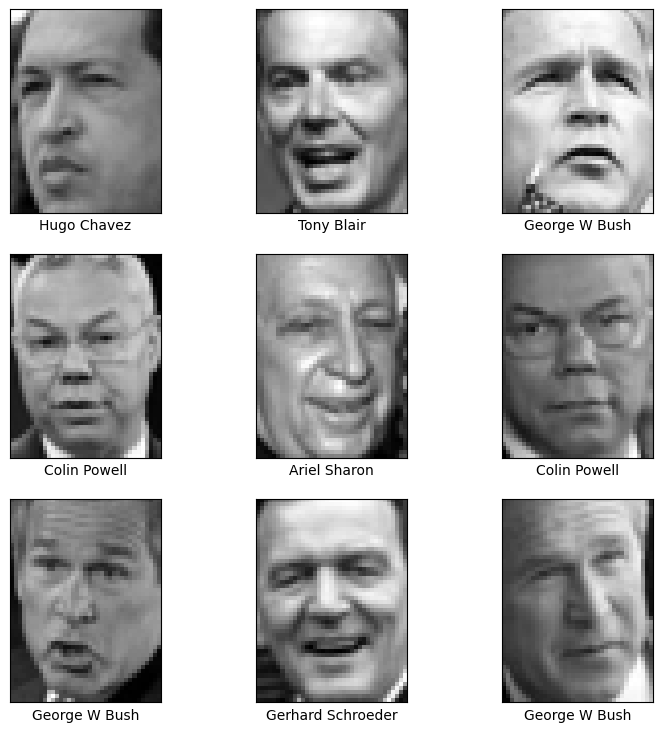

In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Carregar o dataset LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Exibir algumas imagens do dataset
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(lfw_people.images[i], cmap='gray')
    ax.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[lfw_people.target[i]])
plt.show()


In [3]:
# Verificar o formato dos dados carregados
print(f"Dimensão dos dados: {lfw_people.data.shape}")
print(f"Labels (target) das imagens: {lfw_people.target_names}")


Dimensão dos dados: (1288, 1850)
Labels (target) das imagens: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


In [4]:
from sklearn.decomposition import PCA

# Definir o número de componentes principais a serem mantidos (150 é um bom número)
n_components = 150
pca = PCA(n_components=n_components, whiten=True).fit(lfw_people.data)

# Transformar os dados com PCA
X_pca = pca.transform(lfw_people.data)

# Exibir a quantidade de componentes
print(f"Forma dos dados após PCA: {X_pca.shape}")


Forma dos dados após PCA: (1288, 150)


In [5]:
from sklearn.model_selection import train_test_split

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_pca, lfw_people.target, test_size=0.25, random_state=42)

# Verificar as dimensões dos conjuntos de treino e teste
print(f"Dados de treino: {X_train.shape}, Dados de teste: {X_test.shape}")


Dados de treino: (966, 150), Dados de teste: (322, 150)


In [6]:
from sklearn.svm import SVC

# Criar e treinar o modelo SVM com kernel linear
svm = SVC(kernel='linear', class_weight='balanced')
svm.fit(X_train, y_train)

# Avaliar o modelo
y_pred = svm.predict(X_test)


In [7]:
from sklearn.metrics import classification_report

# Gerar o relatório de classificação
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))


                   precision    recall  f1-score   support

     Ariel Sharon       0.54      0.54      0.54        13
     Colin Powell       0.63      0.80      0.71        60
  Donald Rumsfeld       0.62      0.78      0.69        27
    George W Bush       0.89      0.78      0.83       146
Gerhard Schroeder       0.74      0.80      0.77        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.79      0.72      0.75        36

         accuracy                           0.76       322
        macro avg       0.70      0.71      0.70       322
     weighted avg       0.77      0.76      0.76       322



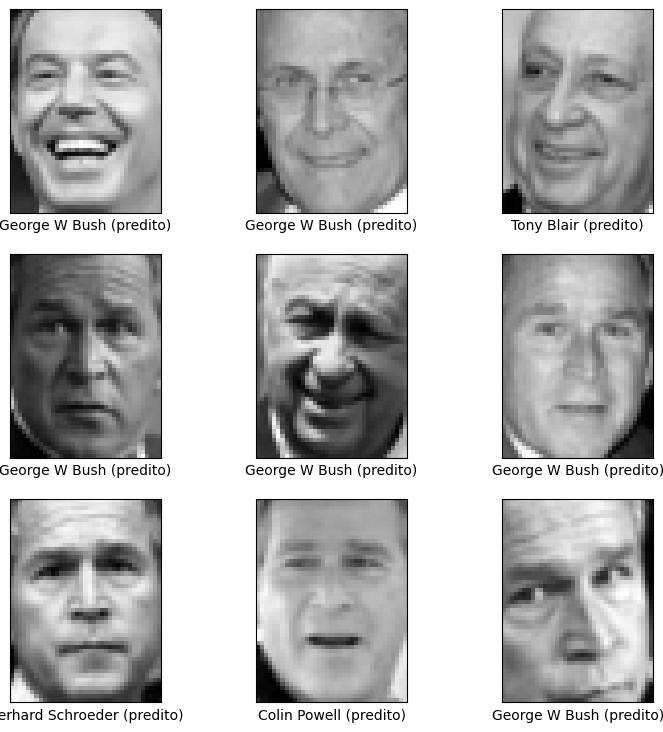

In [9]:
# Exibir algumas imagens de teste e as respectivas predições
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(lfw_people.images[i + len(X_train)], cmap='gray')
    ax.set(xticks=[], yticks=[], xlabel=lfw_people.target_names[y_pred[i]] + " (predito)")
plt.show()